In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np

from IPython.display import Image
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image



In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory("C:/Users/USUARIO/Desktop/ciberseguridad/6. Tratamiento de datos/tareas/examen/CarneDataset/train",
validation_split=0.2,
subset="training",
seed=123,
image_size=(300,300))

Found 1633 files belonging to 8 classes.
Using 1307 files for training.


In [4]:
class_names = train_ds.class_names
print(class_names)

['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


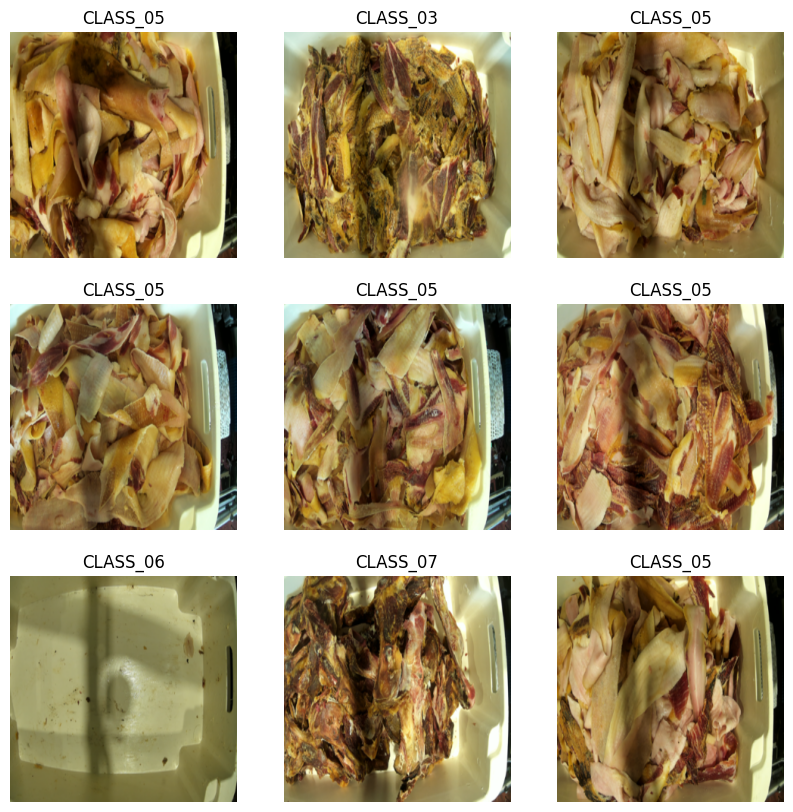

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(), tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(num_classes)
])

In [7]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

In [12]:
epochs=20

history = model.fit(
    train_ds,
    epochs = epochs
)

Epoch 1/20
41/41 [==============================] - 47s 1s/step - loss: 1.4304 - accuracy: 0.5761
Epoch 2/20
41/41 [==============================] - 46s 1s/step - loss: 0.6696 - accuracy: 0.7437
Epoch 3/20
41/41 [==============================] - 47s 1s/step - loss: 0.3329 - accuracy: 0.8860
Epoch 4/20
41/41 [==============================] - 45s 1s/step - loss: 0.2172 - accuracy: 0.9243
Epoch 5/20
41/41 [==============================] - 45s 1s/step - loss: 0.1580 - accuracy: 0.9526
Epoch 6/20
41/41 [==============================] - 45s 1s/step - loss: 0.0493 - accuracy: 0.9885
Epoch 7/20
41/41 [==============================] - 45s 1s/step - loss: 0.0201 - accuracy: 0.9985
Epoch 8/20
41/41 [==============================] - 45s 1s/step - loss: 0.0487 - accuracy: 0.9847
Epoch 9/20
41/41 [==============================] - 46s 1s/step - loss: 0.0242 - accuracy: 0.9931
Epoch 10/20
41/41 [==============================] - 51s 1s/step - loss: 0.0028 - accuracy: 1.0000
Epoch 11/20
41/41 [

In [9]:
test_ds = tf.keras.utils.image_dataset_from_directory("C:/Users/USUARIO/Desktop/ciberseguridad/6. Tratamiento de datos/tareas/examen/CarneDataset/test",
                                                     seed=123,
                                                     image_size=(300,300))

Found 810 files belonging to 8 classes.


In [16]:
model.evaluate(test_ds,return_dict=True)

26/26 [==============================] - 9s 318ms/step - loss: 2.0842 - accuracy: 0.0593


{'loss': 2.0841708183288574, 'accuracy': 0.05925925821065903}

In [22]:
image_path = "C:/Users/USUARIO/Desktop/ciberseguridad/6. Tratamiento de datos/tareas/examen/CarneDataset/practica2.png"
image = tf.keras.preprocessing.image.load_img(image_path).resize((300,300))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)

1/1 [==============================] - 0s 38ms/step


In [23]:
score = tf.nn.softmax(predictions[0])
print("Esta imagen pertenece a {}, su presicion es del {:.2f}%"
      .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Esta imagen pertenece a CLASS_02, su presicion es del 14.13%
